In [1]:
import warnings ;warnings.filterwarnings('ignore')
import sys ;sys.path.append("../../../")
from  CommonFunc import *

192

◎ 현재 경로의 폴더 목록 --
  0. /Users/forrestdpark/Desktop/PDG/Python_/BerryMLcompetetion/공모전/서울GovTech/돌봄서비스/데이터파일
  1. /Users/forrestdpark/Desktop/PDG/Python_/BerryMLcompetetion/공모전/서울GovTech/돌봄서비스/사진
◎ 주피터 가상환경 체크 : base
◎ Python 설치 경로:/opt/anaconda3/bin/python
◎ Graph 한글화 Setting
◎ OS platform 한글 세팅완료
✻✻✻✻______🤗 10-11 번 파일 데이터 보고 분석 by Forrest.D.Park 🤗______✻✻✻✻


Data File 불러오는 중..:  1%|          | 1/100 [elapsed: 00:02 remaining: 04:56]



10.여성가족부_아이돌봄 월별신청현황-연령대별 정보 서비스_20240612.xlsx 파일의 데이터 프레임.tail() 


,기준연월,아이돌봄기관번호,아이돌봄기관명,질병서비스여부,돌봄구분명,서비스다양화명,상위아이돌봄기관번호,상위아이돌봄기관명,연령0세신청건수,연령1세신청건수,연령2세신청건수,연령3세신청건수,연령4세신청건수,연령5세신청건수,연령6세신청건수,연령7세신청건수,연령8세신청건수,연령9세신청건수,연령10세신청건수,연령11세신청건수,연령12세신청건수,데이터기준일자
33955,202404,C0451,칠곡군가족센터,N,종일제,일반형,C0506,경상북도 광역거점,0,24,76,0,0,0,0,0,0,0,0,0,0,20240612
33956,202404,C0451,칠곡군가족센터,Y,시간제,일반형,C0506,경상북도 광역거점,5,0,17,1,3,1,0,0,0,0,0,0,0,20240612
33957,202404,C0381,하남시 가족센터,N,시간제,일반형,C0498,경기도 아이돌봄광역지원센터,1096,1455,1428,1181,1048,1032,958,650,520,296,234,189,116,20240612
33958,202404,C0381,하남시 가족센터,N,종일제,일반형,C0498,경기도 아이돌봄광역지원센터,73,58,0,0,0,0,0,0,0,0,0,0,0,20240612
33959,202404,C0381,하남시 가족센터,Y,시간제,일반형,C0498,경기도 아이돌봄광역지원센터,0,0,0,0,0,2,0,0,0,0,0,0,0,20240612


 ◎ Column  : 22 개 

   기준연월,    아이돌봄기관번호,    아이돌봄기관명,    질병서비스여부,    돌봄구분명, 
   서비스다양화명,    상위아이돌봄기관번호,    상위아이돌봄기관명,    연령0세신청건수,    연령1세신청건수, 
   연령2세신청건수,    연령3세신청건수,    연령4세신청건수,    연령5세신청건수,    연령6세신청건수, 
   연령7세신청건수,    연령8세신청건수,    연령9세신청건수,    연령10세신청건수,    연령11세신청건수, 
   연령12세신청건수,    데이터기준일자, 
 ◎ Row size    : 33960 개
 ◎ Null count   : 0 개
 ◎ 칼럼별 데이터 중복체크
   □ 1번째 칼럼 " 기준연월"  타입 int64) 
    52 	/33960 	[uniq/raw]


,"""기준연월"" 칼럼의 중복값",개수분포
1,202209,717
2,202307,711
3,202208,709
4,202306,708
5,202308,706
6,202305,702
7,202210,698
8,202309,697
9,202212,697
10,202304,696


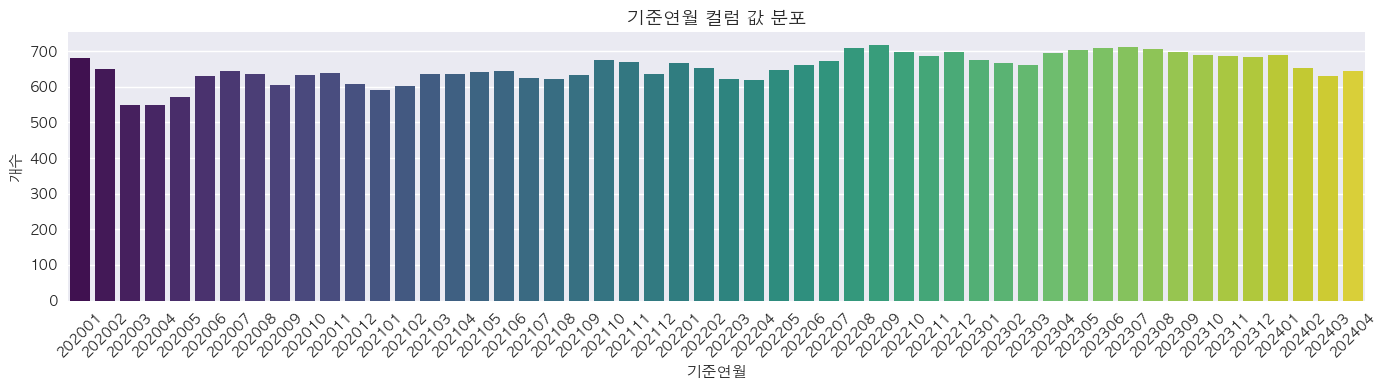

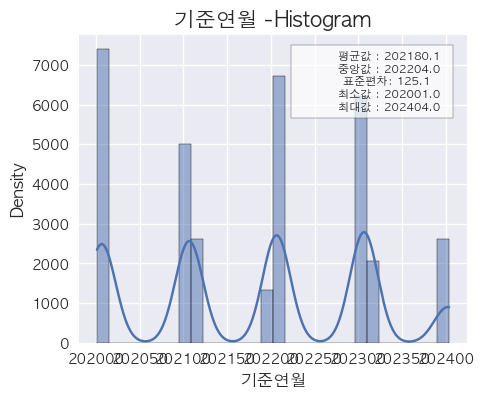

   □ 2번째 칼럼 " 아이돌봄기관번호"  타입 object) 
    228 	/33960 	[uniq/raw]


,"""아이돌봄기관번호"" 칼럼의 중복값",개수분포
1,C0336,207
2,C0291,207
3,C0382,206
4,C0340,205
5,C0341,205
6,C0376,204
7,C0453,203
8,C0369,202
9,C0466,202
10,C0451,202


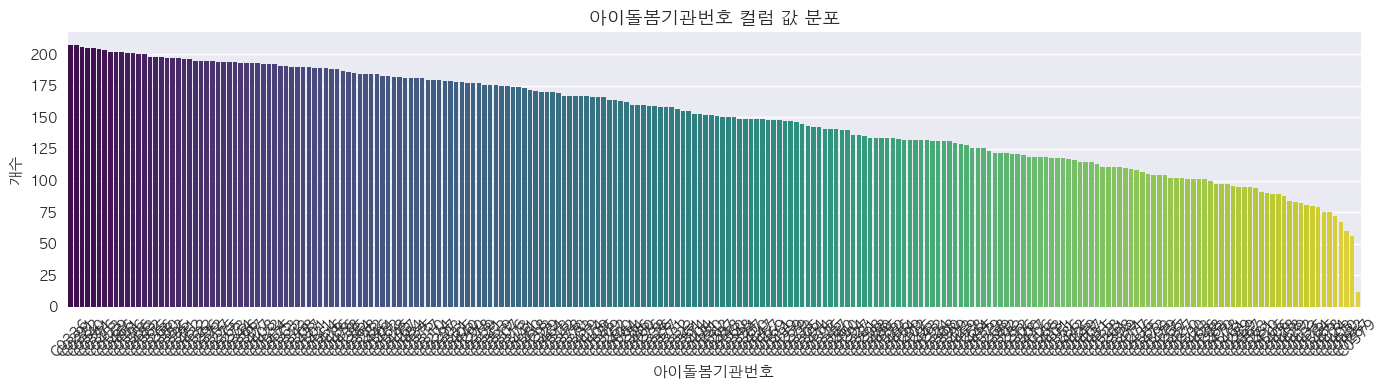

숫자형데이터가 아닙니다
   □ 3번째 칼럼 " 아이돌봄기관명"  타입 object) 
    228 	/33960 	[uniq/raw]


,"""아이돌봄기관명"" 칼럼의 중복값",개수분포
1,인천서구 아이돌봄지원센터,207
2,서울 강동구 가족센터,207
3,경기 화성시가족센터,206
4,광주 광산구 (사)광주디아코니아,205
5,광주 남구 사단법인 그루터기,205
6,의왕시건강가정지원센터(의왕시가족센터),204
7,경기 의정부시 가족센터,203
8,경기 안양시 가족센터,202
9,경남 창원 사단법인희망이룸,202
10,칠곡군가족센터,202


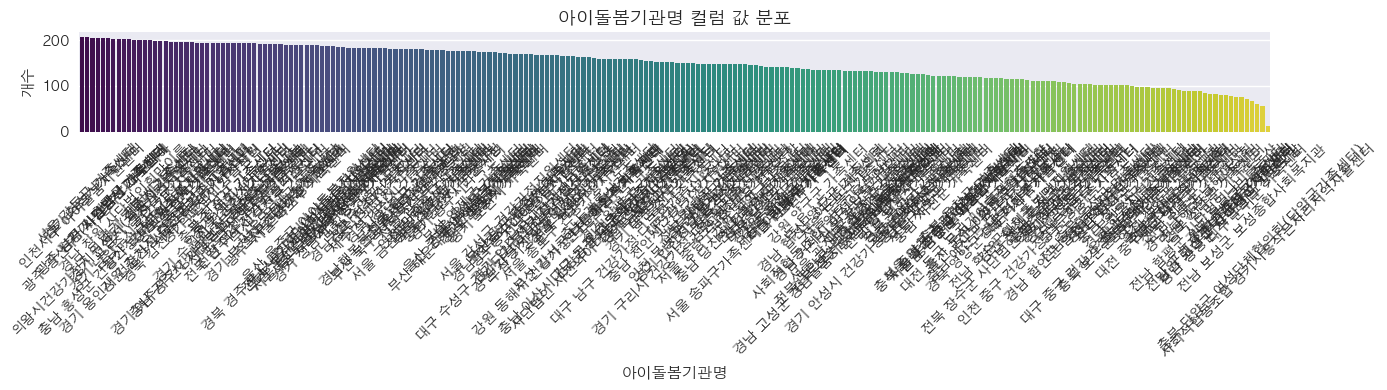

숫자형데이터가 아닙니다
   □ 4번째 칼럼 " 질병서비스여부"  타입 object) 
    2 	/33960 	[uniq/raw]


,"""질병서비스여부"" 칼럼의 중복값",개수분포
1,N,27573
2,Y,6387


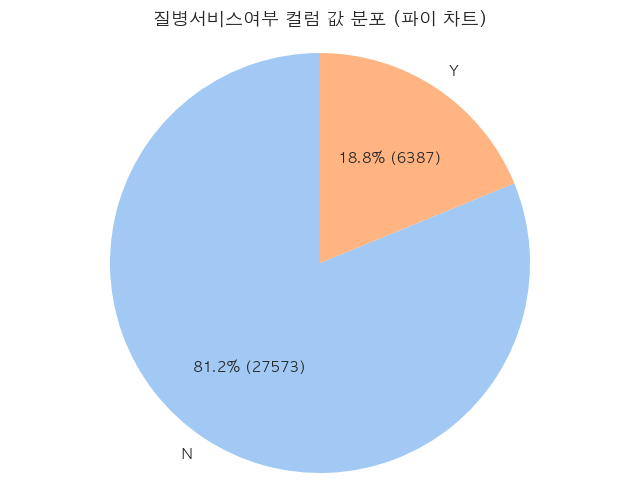

숫자형데이터가 아닙니다
   □ 5번째 칼럼 " 돌봄구분명"  타입 object) 
    2 	/33960 	[uniq/raw]


,"""돌봄구분명"" 칼럼의 중복값",개수분포
1,시간제,23823
2,종일제,10137


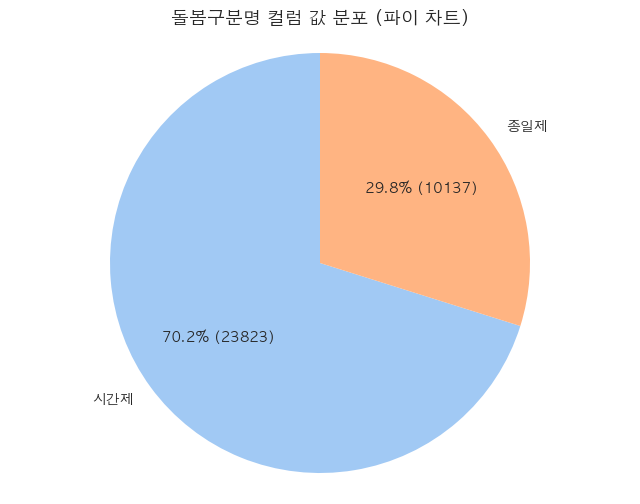

숫자형데이터가 아닙니다
   □ 6번째 칼럼 " 서비스다양화명"  타입 object) 
    2 	/33960 	[uniq/raw]


,"""서비스다양화명"" 칼럼의 중복값",개수분포
1,일반형,28293
2,종합형,5667


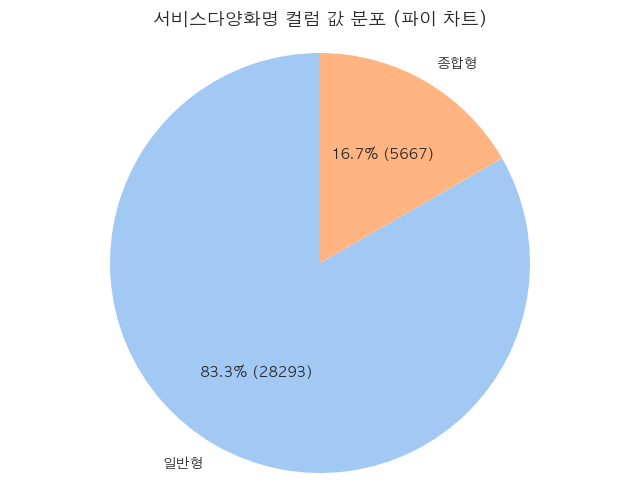

숫자형데이터가 아닙니다
   □ 7번째 칼럼 " 상위아이돌봄기관번호"  타입 object) 
    17 	/33960 	[uniq/raw]


,"""상위아이돌봄기관번호"" 칼럼의 중복값",개수분포
1,C0498,5399
2,C0491,4097
3,C0506,3338
4,C0490,2641
5,C0505,2591
6,C0500,2575
7,C0492,2374
8,C0502,2168
9,C0503,1906
10,C0501,1392


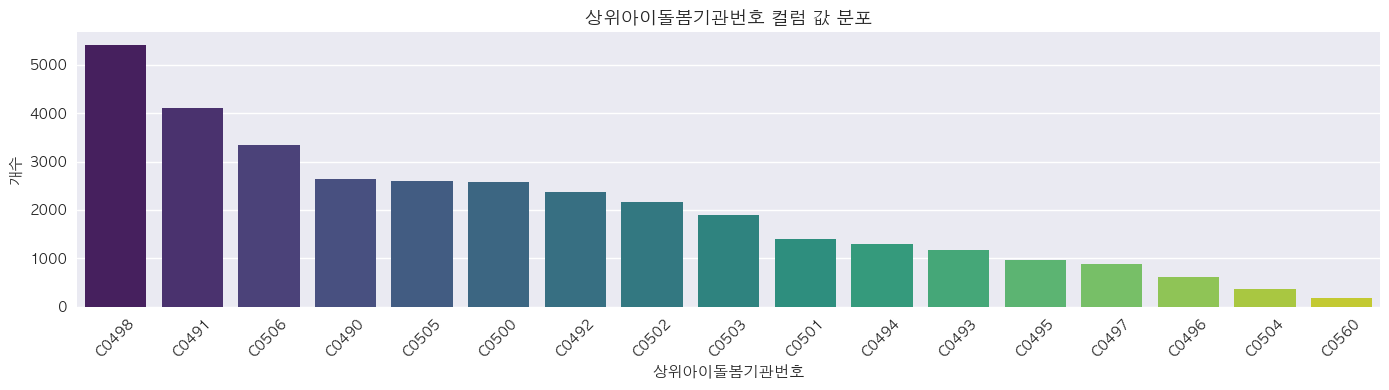

숫자형데이터가 아닙니다
   □ 8번째 칼럼 " 상위아이돌봄기관명"  타입 object) 
    17 	/33960 	[uniq/raw]


,"""상위아이돌봄기관명"" 칼럼의 중복값",개수분포
1,경기도 아이돌봄광역지원센터,5399
2,서울특별시 광역거점,4097
3,경상북도 광역거점,3338
4,경상남도가족센터,2641
5,전라남도 광역거점,2591
6,강원도 광역거점,2575
7,부산광역시아이돌봄광역지원센터,2374
8,충청남도 광역거점,2168
9,전라북도 광역거점,1906
10,충청북도 광역거점,1392


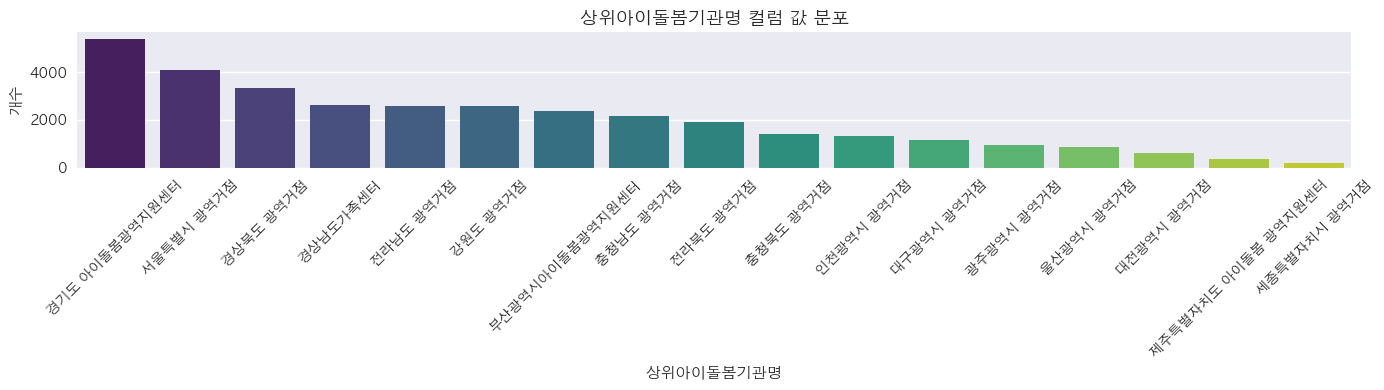

숫자형데이터가 아닙니다
   □ 9번째 칼럼 " 연령0세신청건수"  타입 int64) 
    1189 	/33960 	[uniq/raw]


,"""연령0세신청건수"" 칼럼의 중복값",개수분포
1,0,13328
2,20,355
3,1,345
4,22,333
5,2,315
6,21,306
7,40,266
8,19,240
9,44,211
10,42,199


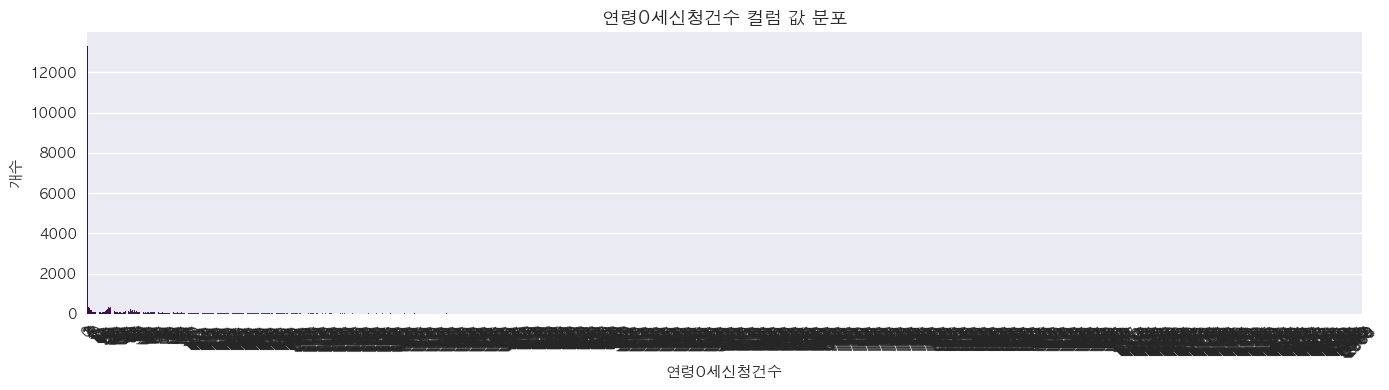

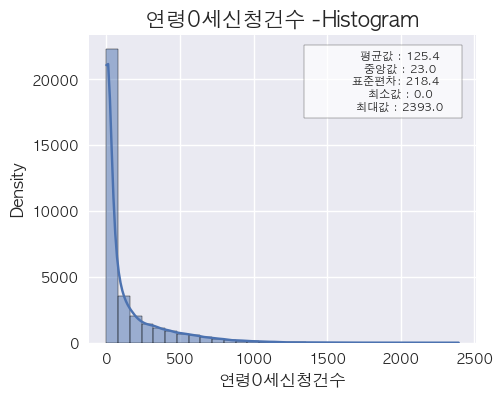

   □ 10번째 칼럼 " 연령1세신청건수"  타입 int64) 
    1543 	/33960 	[uniq/raw]


,"""연령1세신청건수"" 칼럼의 중복값",개수분포
1,0,8663
2,1,692
3,2,660
4,4,441
5,3,438
6,20,435
7,22,360
8,21,308
9,5,269
10,19,248


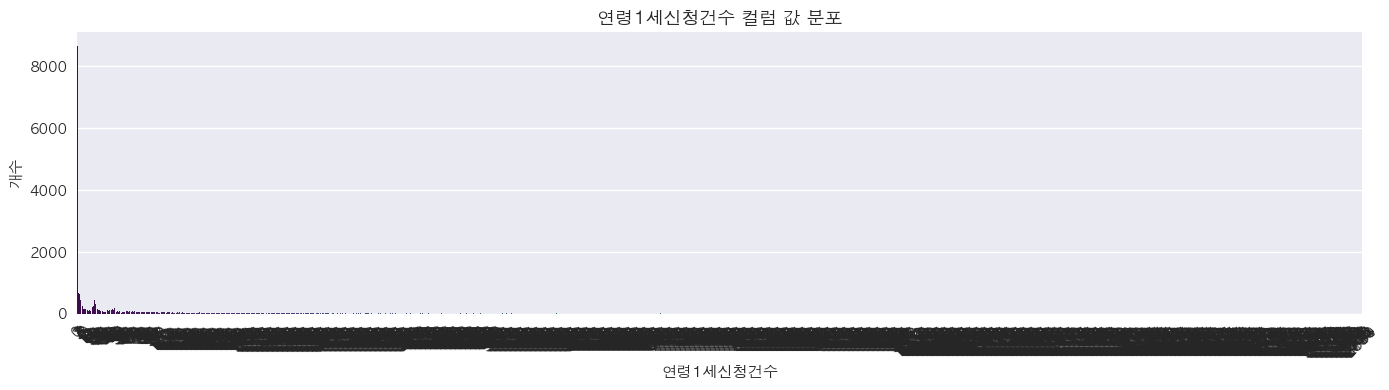

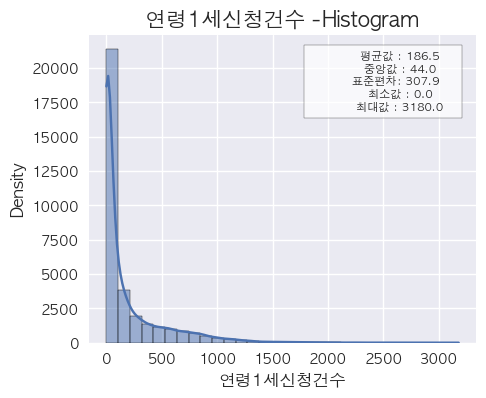

   □ 11번째 칼럼 " 연령2세신청건수"  타입 int64) 
    1500 	/33960 	[uniq/raw]


,"""연령2세신청건수"" 칼럼의 중복값",개수분포
1,0,11082
2,1,734
3,2,716
4,20,545
5,4,435
6,3,402
7,21,365
8,22,357
9,19,299
10,5,263


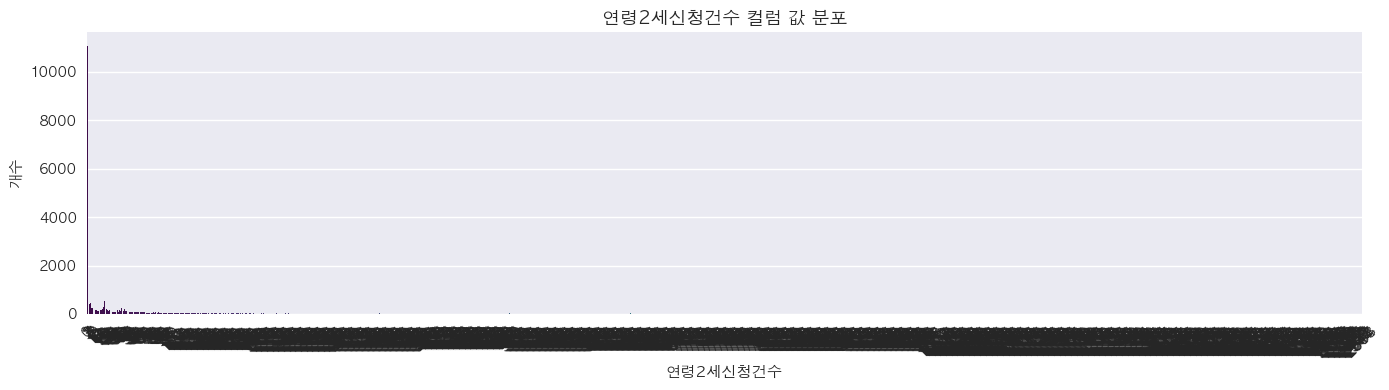

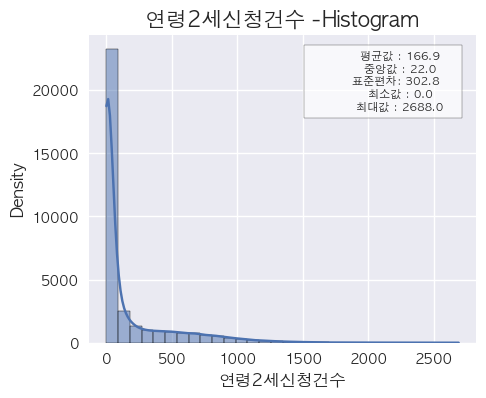

   □ 12번째 칼럼 " 연령3세신청건수"  타입 int64) 
    1480 	/33960 	[uniq/raw]


,"""연령3세신청건수"" 칼럼의 중복값",개수분포
1,0,16712
2,1,689
3,2,667
4,3,432
5,4,404
6,6,273
7,5,256
8,20,203
9,8,184
10,22,182


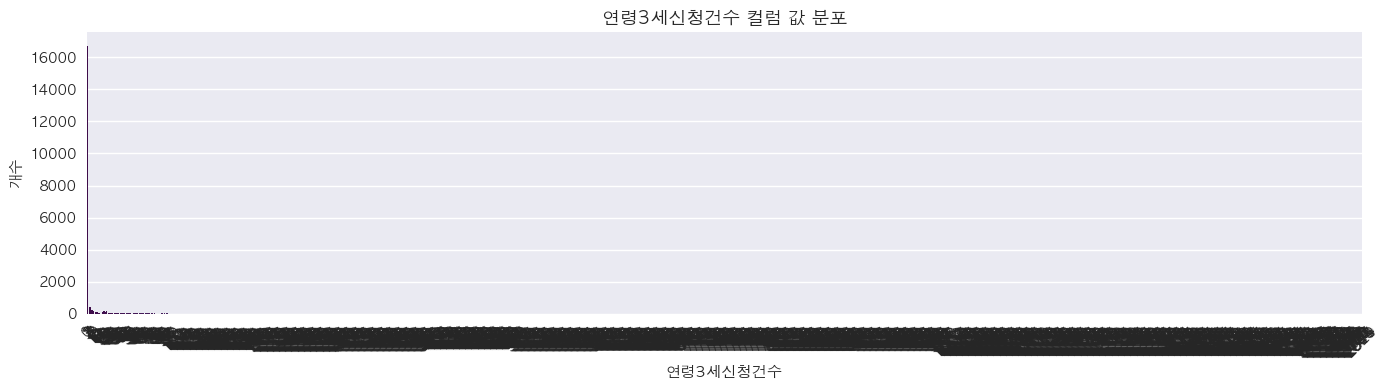

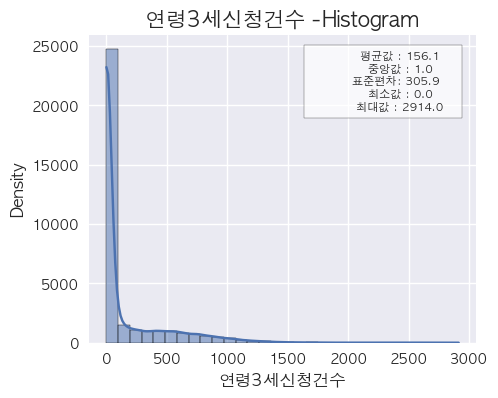

   □ 13번째 칼럼 " 연령4세신청건수"  타입 int64) 
    1465 	/33960 	[uniq/raw]


,"""연령4세신청건수"" 칼럼의 중복값",개수분포
1,0,17475
2,1,705
3,2,582
4,4,420
5,3,394
6,6,234
7,5,229
8,20,158
9,8,155
10,19,140


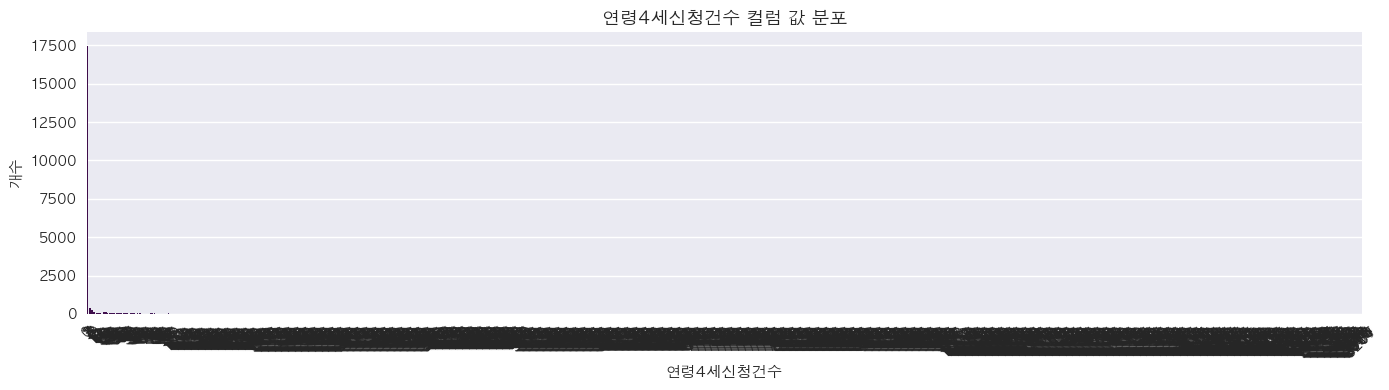

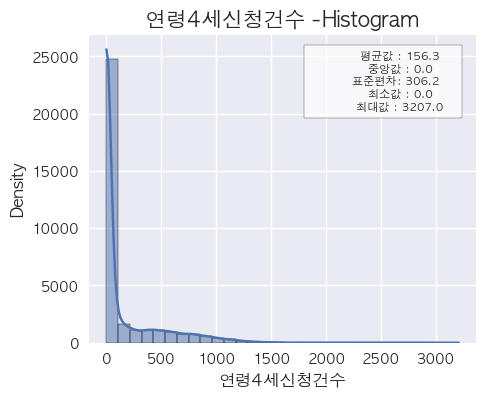

   □ 14번째 칼럼 " 연령5세신청건수"  타입 int64) 
    1449 	/33960 	[uniq/raw]


,"""연령5세신청건수"" 칼럼의 중복값",개수분포
1,0,17779
2,1,670
3,2,578
4,3,347
5,4,309
6,5,196
7,22,181
8,20,175
9,6,172
10,8,160


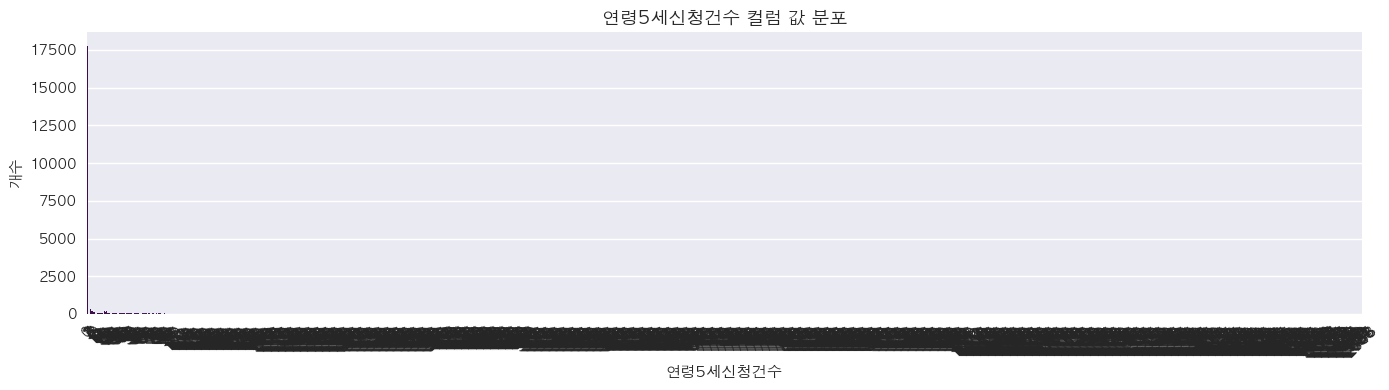

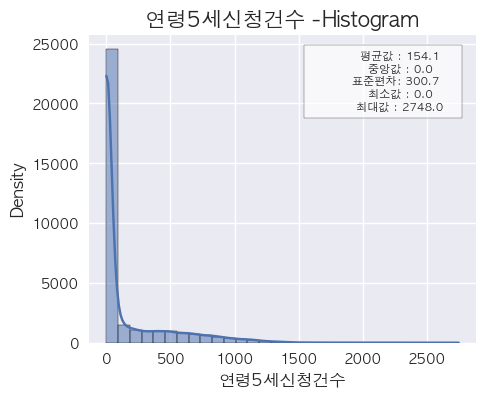

   □ 15번째 칼럼 " 연령6세신청건수"  타입 int64) 
    1363 	/33960 	[uniq/raw]


,"""연령6세신청건수"" 칼럼의 중복값",개수분포
1,0,18474
2,1,564
3,2,447
4,4,255
5,3,250
6,22,166
7,6,158
8,20,155
9,19,142
10,21,140


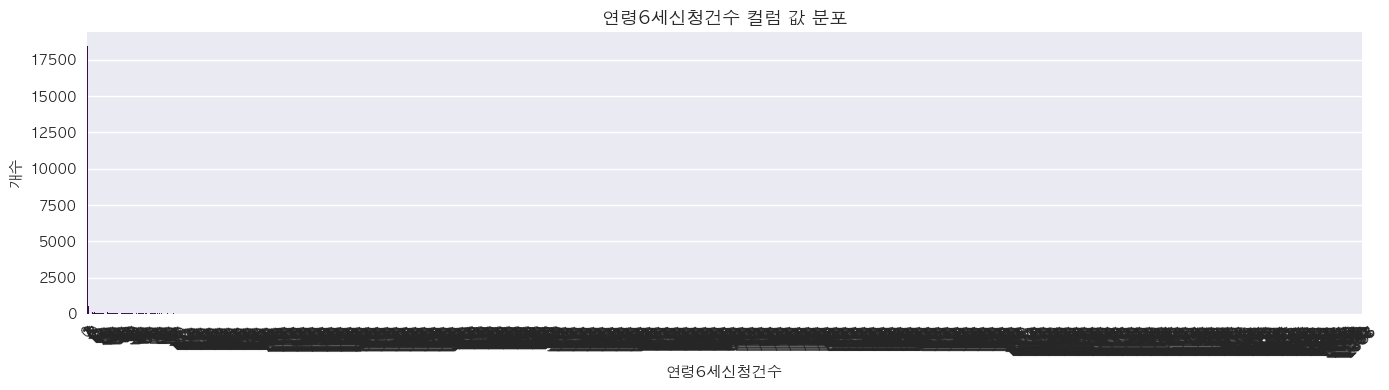

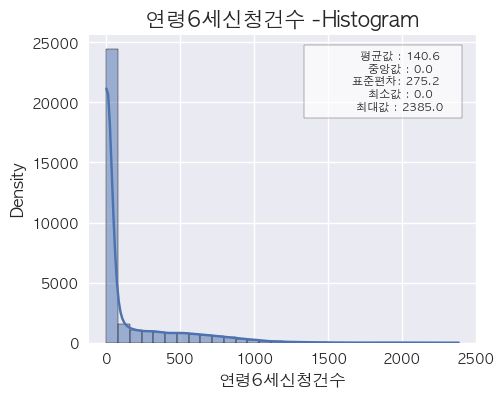

   □ 16번째 칼럼 " 연령7세신청건수"  타입 int64) 
    1184 	/33960 	[uniq/raw]


,"""연령7세신청건수"" 칼럼의 중복값",개수분포
1,0,19398
2,1,373
3,2,249
4,3,194
5,20,184
6,21,168
7,22,166
8,4,165
9,19,141
10,18,112


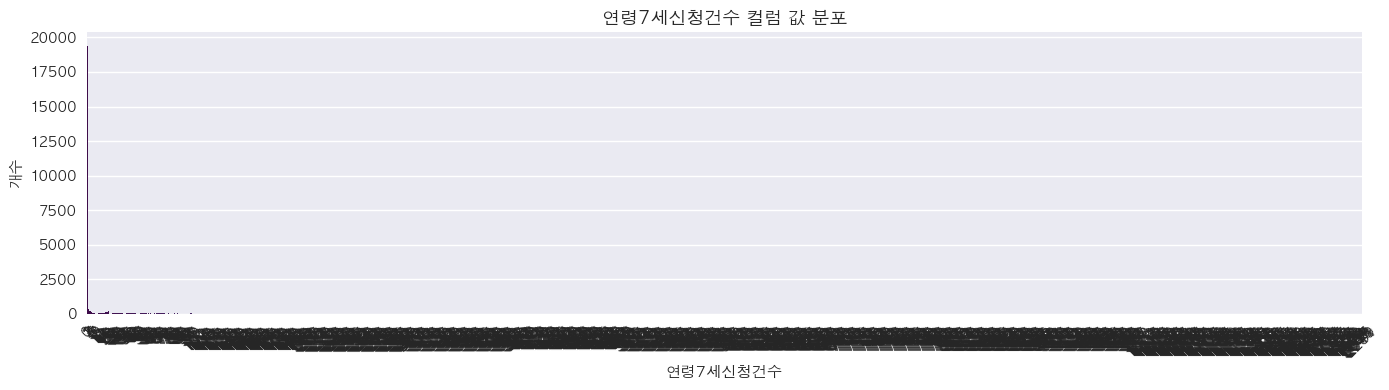

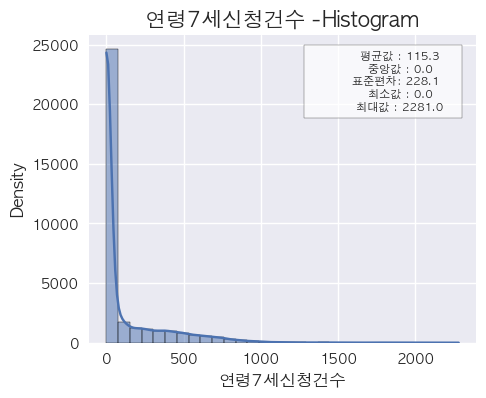

   □ 17번째 칼럼 " 연령8세신청건수"  타입 int64) 
    903 	/33960 	[uniq/raw]


,"""연령8세신청건수"" 칼럼의 중복값",개수분포
1,0,20121
2,1,276
3,2,217
4,22,171
5,20,168
6,19,163
7,3,142
8,4,139
9,21,128
10,16,103


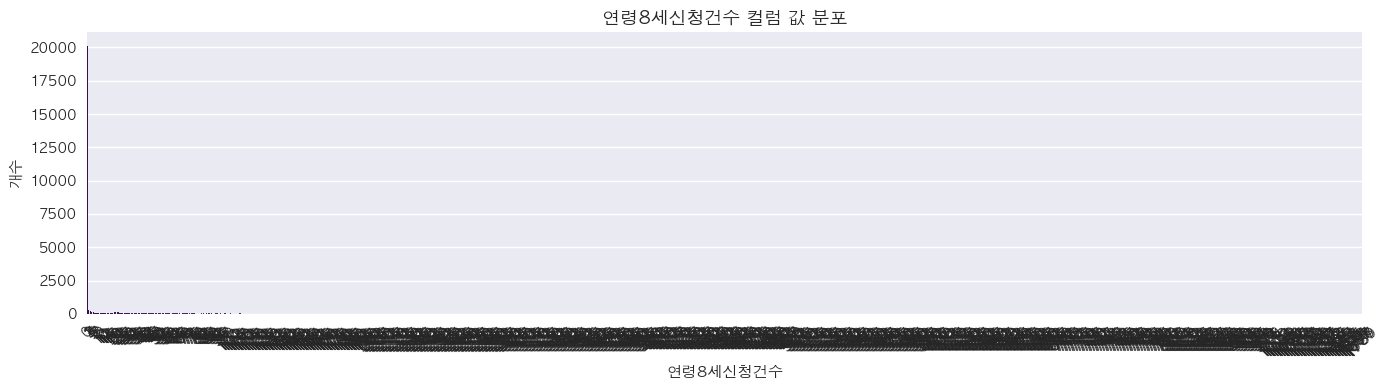

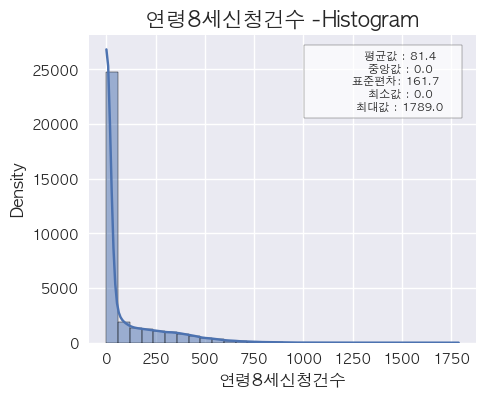

   □ 18번째 칼럼 " 연령9세신청건수"  타입 int64) 
    672 	/33960 	[uniq/raw]


,"""연령9세신청건수"" 칼럼의 중복값",개수분포
1,0,20860
2,1,198
3,20,174
4,22,164
5,19,154
6,21,148
7,2,145
8,18,129
9,4,113
10,8,105


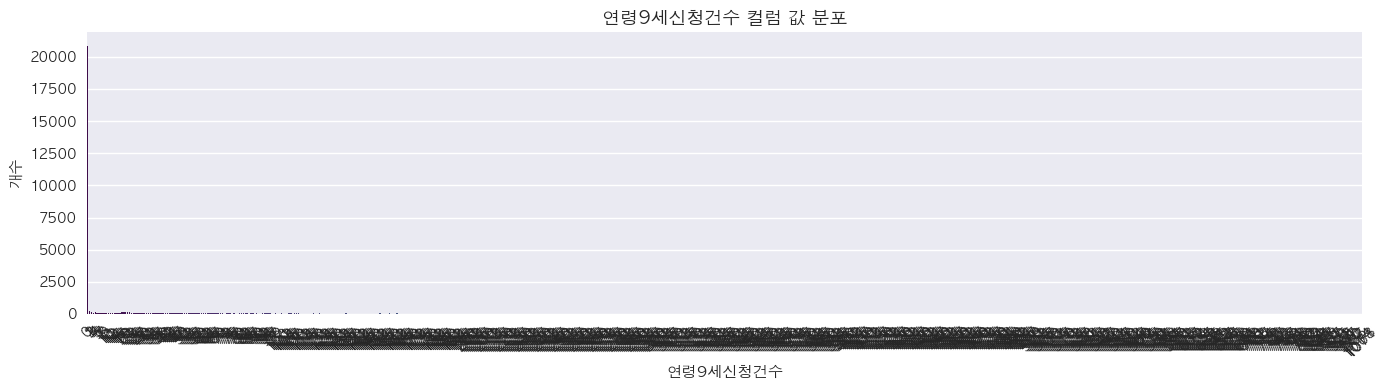

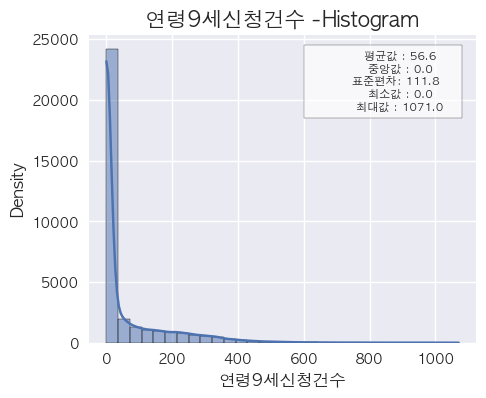

   □ 19번째 칼럼 " 연령10세신청건수"  타입 int64) 
    534 	/33960 	[uniq/raw]


,"""연령10세신청건수"" 칼럼의 중복값",개수분포
1,0,21670
2,22,202
3,20,191
4,1,150
5,21,149
6,19,139
7,4,127
8,2,123
9,23,121
10,8,114


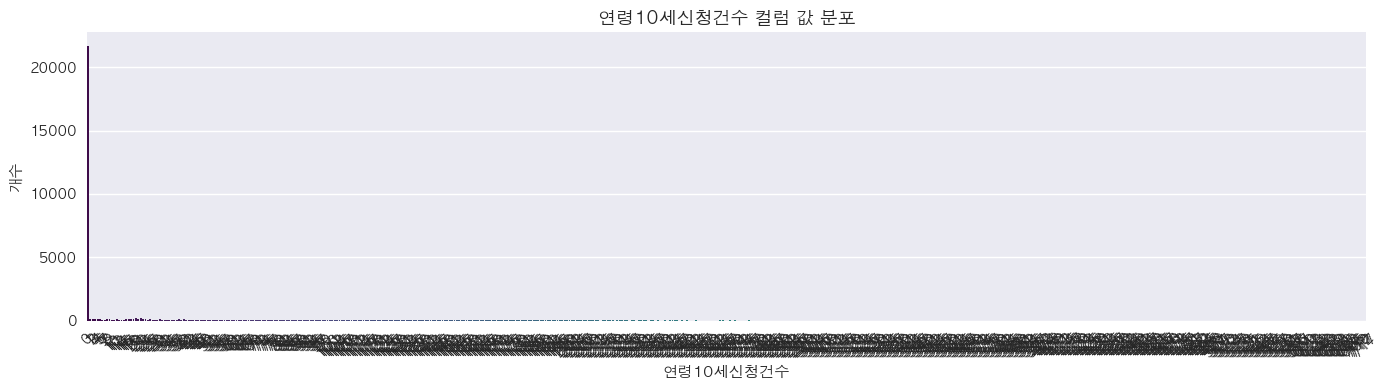

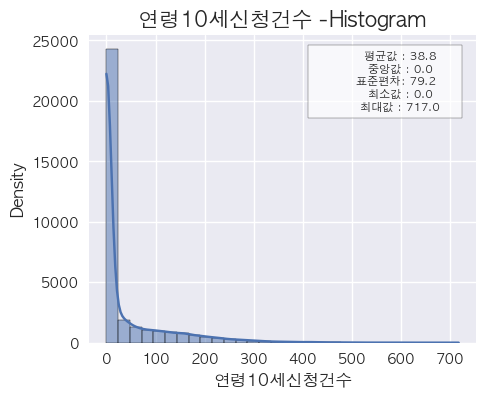

   □ 20번째 칼럼 " 연령11세신청건수"  타입 int64) 
    400 	/33960 	[uniq/raw]


,"""연령11세신청건수"" 칼럼의 중복값",개수분포
1,0,22667
2,22,250
3,20,222
4,21,195
5,19,175
6,26,158
7,1,141
8,4,130
9,23,127
10,2,123


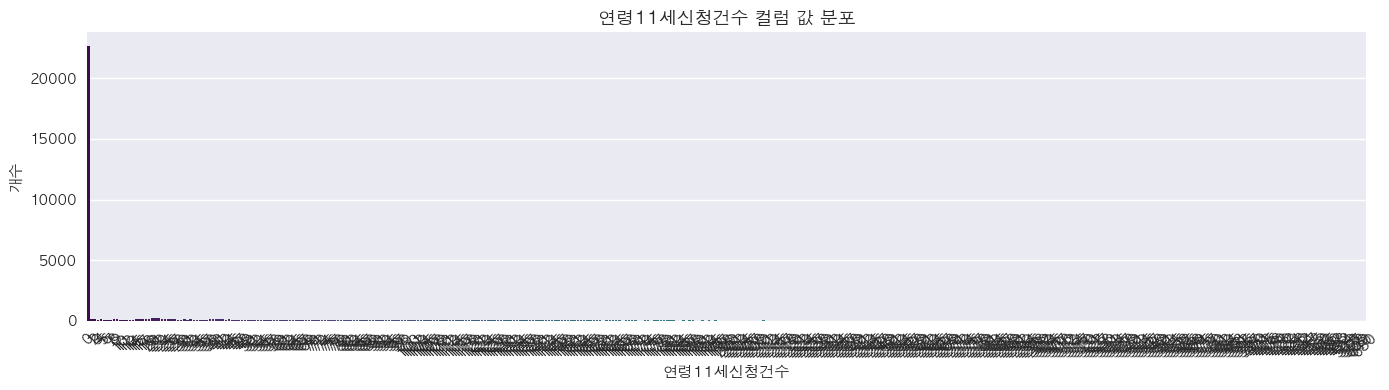

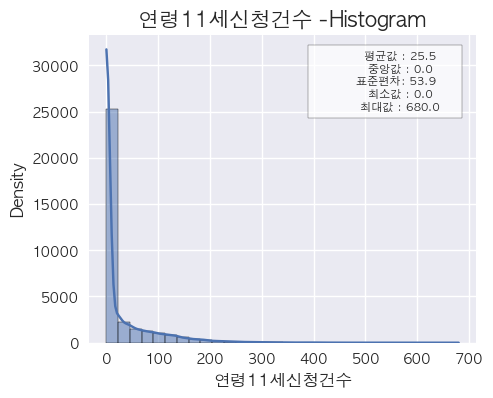

   □ 21번째 칼럼 " 연령12세신청건수"  타입 int64) 
    265 	/33960 	[uniq/raw]


,"""연령12세신청건수"" 칼럼의 중복값",개수분포
1,0,24502
2,22,260
3,20,257
4,19,213
5,21,198
6,18,154
7,8,153
8,4,152
9,24,151
10,26,145


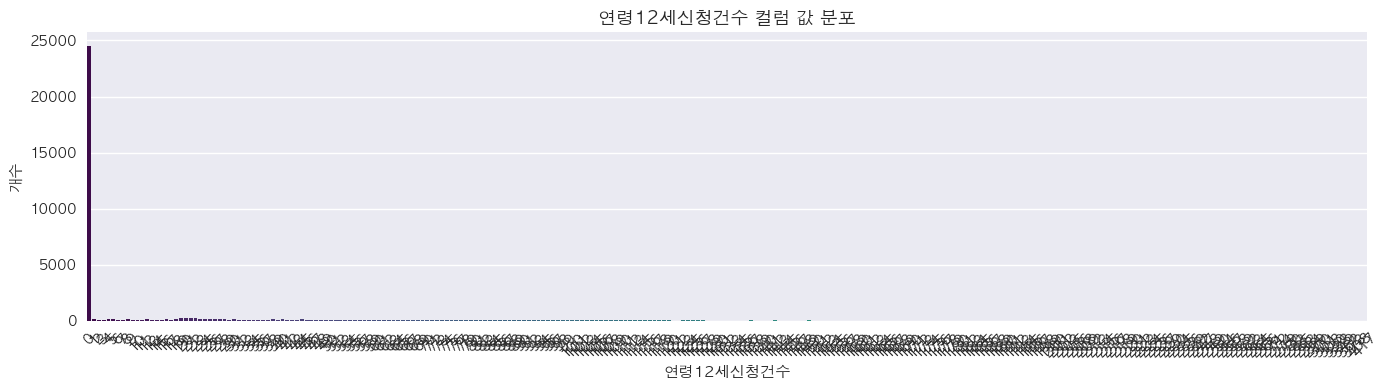

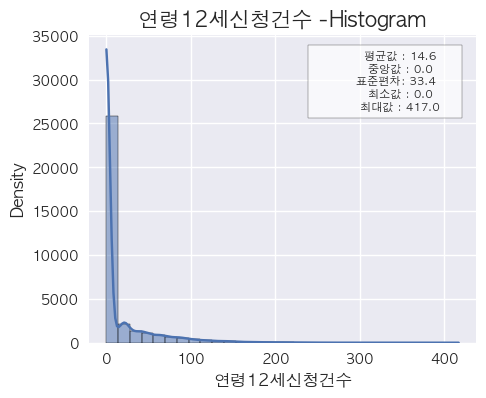

   □ 22번째 칼럼 " 데이터기준일자"  타입 int64) 
    1 	/33960 	[uniq/raw]


,"""데이터기준일자"" 칼럼의 중복값",개수분포
1,20240612,33960


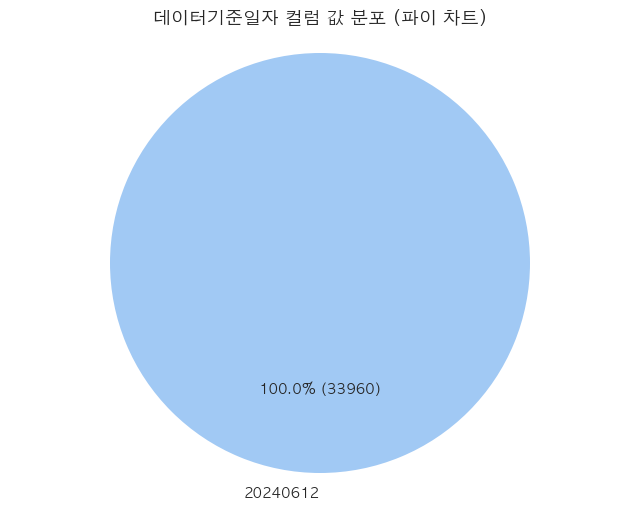

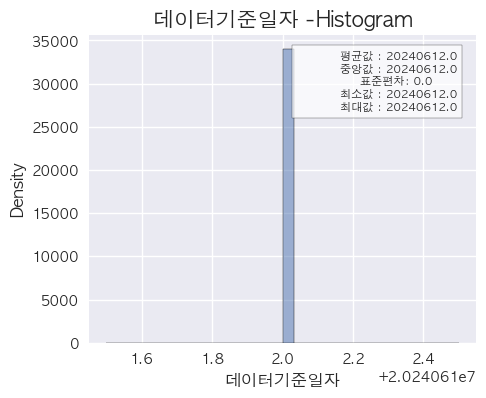

	[RESULT] 🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀
	🟦10개이하의 값 종류를 가지는 칼럼 
		- 기준연월:52: [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104, 202105, 202106, 202107, 202108, 202109, 202110, 202111, 202112, 202201, 202202, 202203, 202204, 202205, 202206, 202207, 202208, 202209, 202210, 202211, 202212, 202301, 202302, 202303, 202304, 202305, 202306, 202307, 202308, 202309, 202310, 202311, 202312, 202401, 202402, 202403, 202404]
		- 아이돌봄기관번호:228: ['C0421', 'C0383', 'C0384', 'C0385', 'C0387', 'C0388', 'C0389', 'C0390', 'C0391', 'C0392', 'C0393', 'C0394', 'C0395', 'C0258', 'C0259', 'C0260', 'C0261', 'C0262', 'C0355', 'C0356', 'C0357', 'C0358', 'C0359', 'C0360', 'C0361', 'C0362', 'C0483', 'C0481', 'C0363', 'C0364', 'C0365', 'C0366', 'C0367', 'C0368', 'C0369', 'C0370', 'C0371', 'C0372', 'C0373', 'C0374', 'C0375', 'C0453', 'C0378', 'C0379', 'C0380', 'C0382', 'C0454', 'C0455', 'C0456', 'C0458', 'C0461', 'C0462', 'C0463', 'C0464', '

In [25]:

def data_watch(start_):
    
    DataPreprocessing.plotSetting()
    ## Data Fetching
    data_folder_path="./데이터파일"
    start_data  =start_
    end_data =start_data+1
    Analysis_title(f"{start_data}-{end_data} 번 파일 데이터 보고 분석 by Forrest.D.Park")
    data_dict=DataPreprocessing.data_fetch(data_folder_path,start_data,end_data)
    for i in range(len(data_dict.keys())):
        data_num= sorted(data_dict.keys())[i]
        print(yellow(f"\n\n{data_num} 파일의 데이터 프레임.tail() "))
        # 화면 가운데 정렬하여 출력
        df_display_centered(DataPreprocessing.key_selector(data_dict, i).tail())
        DataPreprocessing.dataInfo2(DataPreprocessing.key_selector(data_dict,i))
    return data_dict

data_dict=data_watch(10)

--- 
### 수치형 데이터일 경우 Gropu by 하고 싶을 때 돌리는 함수 제작 

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


test = DataPreprocessing.key_selector(data_dict, 0)
df_display_centered(test.tail(3))
기준연월 = test['기준연월'].unique()
## 시간대별 데이터를 보는 함수 



def plot_by_timeline(df, time_col_word='시간',group_by_col =['기준연월']):
    numeric_columns=test.select_dtypes(include=['number'])
    # time_columns = [col for col in df.columns if time_col_word in col] ## 들어간 단어로 구분하고싶을때
    # print(time_columns)
    # 시간대별 데이터 그룹화
    grouped_df_sum = df.groupby(group_by_col)[numeric_columns].sum().reset_index()  
    grouped_df_mean = df.groupby(group_by_col)[numeric_columns].mean().reset_index()  
    df_display_centered(grouped_df_sum.head(3))
    return grouped_df_mean,grouped_df_sum  # grouped_df_mean 반환

def pie_plot(df):
    import matplotlib.pyplot as plt
    import seaborn as sns, pandas as pd
    plt.figure(figsize=(8, 6))  # 그래프 크기 설정

    # 시간대별 시작 건수 합계 계산
    time_columns = [col for col in df.columns if '시작건수' in col]
    time_sums = df[time_columns].fillna(0) .mean()

    # 상위 8개 이외의 값을 "기타"로 합치기
    top_8_index = time_sums.nlargest(7).index
    other_sum = time_sums[~time_sums.index.isin(top_8_index)].sum()
    time_sums = pd.concat([time_sums[top_8_index], pd.Series({'기타': other_sum})])  # concat 사용

    # 레이블 설정 및 자르기
    labels = time_sums.index.tolist()
    for i, label in enumerate(labels):
        if len(str(label)) > 6:
            labels[i] = label[2:7] + ""

    # 색상 팔레트 설정
    colors = sns.color_palette("pastel", len(time_sums.values))

    # 퍼센트와 실제 수치 함께 표시하는 함수
    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = int(round(pct * total / 100.0))
            return f'{pct:.1f}% ({val:d})'
        return my_autopct

    # 파이 차트 그리기
    # plt.pie(time_sums.values, labels=labels, autopct=make_autopct(time_sums.values), startangle=90, colors=colors)
    
    plt.pie(time_sums.values, labels=labels, autopct=make_autopct(time_sums.values), startangle=90, colors=colors, 
            wedgeprops={"linewidth": 1, "edgecolor": "black"},  # wedgeprops 추가
            # NaN 값 무시 설정
            # `nan_policy`를 'omit'으로 설정
            nan_policy='omit'
           )
    
    plt.title(f"202001 시간대별 평균 시작 건수 분포", fontsize=13)
    plt.axis('equal')  # 파이 차트를 원형으로 유지
    plt.tight_layout()
    plt.show()  # 그래프 출력
# pie_plot(df)
df = test[test['기준연월'] == 기준연월[0]]
df = plot_by_timeline(df, time_col_word='시간',group_by_col =['기준연월'])
# pie_plot(df)


,기준연월,아이돌봄기관번호,아이돌봄기관명,질병서비스여부,돌봄구분명,서비스다양화명,상위아이돌봄기관번호,상위아이돌봄기관명,연령0세신청건수,연령1세신청건수,연령2세신청건수,연령3세신청건수,연령4세신청건수,연령5세신청건수,연령6세신청건수,연령7세신청건수,연령8세신청건수,연령9세신청건수,연령10세신청건수,연령11세신청건수,연령12세신청건수,데이터기준일자
33957,202404,C0381,하남시 가족센터,N,시간제,일반형,C0498,경기도 아이돌봄광역지원센터,1096,1455,1428,1181,1048,1032,958,650,520,296,234,189,116,20240612
33958,202404,C0381,하남시 가족센터,N,종일제,일반형,C0498,경기도 아이돌봄광역지원센터,73,58,0,0,0,0,0,0,0,0,0,0,0,20240612
33959,202404,C0381,하남시 가족센터,Y,시간제,일반형,C0498,경기도 아이돌봄광역지원센터,0,0,0,0,0,2,0,0,0,0,0,0,0,20240612


int64
object
object
object
object
object
object
object
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64


,기준연월
0,202001


In [17]:
df =test
import matplotlib.pyplot as plt
import seaborn as sns,pandas as pd

# 시간대별 시작 건수 칼럼만 선택
time_columns = [col for col in df.columns if '시간' in col and '시작건수' in col]

# 시간대별 시작 건수 합산
import pandas as pd

# time_columns 에는 시간대를 나타내는 컬럼 이름들이 포함되어 있다고 가정합니다. 


# 시간대별 합계 계산
time_sum = df[time_columns].sum()

# 시간대별 평균 계산
time_mean = df[time_columns].mean()

# 시간대별 합계와 평균을 하나의 DataFrame으로 합치기
result_df = pd.DataFrame({"합계": time_sum, "평균": time_mean})

# 결과 출력
df_display_centered(result_df)
# 그래프 그리기
# plt.figure(figsize=(12, 6))
# sns.barplot(x=time_data.index, y=time_data.values, palette="viridis")

# # 그래프 제목 및 레이블 추가
# plt.title('시간대별 돌봄 서비스 사용 패턴')
# plt.xlabel('시간대')
# plt.ylabel('총 건수')

# # x축 라벨 회전
# plt.xticks(rotation=45)

# # 그래프 표시
# plt.show()

,합계,평균
